## Process data

Load the gea data, take only the two most abundant classes (bc their example is binary classification).

Here I select a random region and I include 8 subregions for each sequence in the training data, not only one.

In [1]:
# set directory of this repo so that all paths can be absolute/relative (not ended with a '/')
path_prefix = '/home/mexposit/cg/gea'

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/home/mexposit/cg/gea/transformers/trans_utils')
from analysis_utils import rev_comp

In [4]:
rev_comp('ATCG')

'CGAT'

### Load data

In [5]:
train_vals = pd.read_csv(f'{path_prefix}/data/train_values.csv', index_col=0)
train_labl = pd.read_csv(f'{path_prefix}/data/train_labels.csv', index_col=0)

In [6]:
train_vals.head()

,sequence,bacterial_resistance_ampicillin,bacterial_resistance_chloramphenicol,bacterial_resistance_kanamycin,bacterial_resistance_other,bacterial_resistance_spectinomycin,copy_number_high_copy,copy_number_low_copy,copy_number_unknown,growth_strain_ccdb_survival,...,species_budding_yeast,species_fly,species_human,species_mouse,species_mustard_weed,species_nematode,species_other,species_rat,species_synthetic,species_zebrafish
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCA...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,GCTGGATGGTTTGGGACATGTGCAGCCCCGTCTCTGTATGGAGTGA...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,NNCCGGGCTGTAGCTACACAGGGCGGAGATGAGAGCCCTACGAAAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,GCGGAGATGAAGAGCCCTACGAAAGCTGAGCCTGCGACTCCCGCAG...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,CGCGCATTACTTCACATGGTCCTCAAGGGTAACATGAAAGTGATCC...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_labl.head()

,00Q4V31T,012VT4JK,028IO5W2,03GRNN7N,03Y3W51H,09MQV1TY,0A4AHRCT,0A9M05NC,0B9GCUVV,0CL7QVG8,...,ZQNGGY33,ZSHS4VJZ,ZT1IP3T6,ZU6860XU,ZU6TVFFU,ZU75P59K,ZUI6TDWV,ZWFD8OHC,ZX06ZDZN,ZZJVE4HO
sequence_id,,,,,,,,,,,,,,,,,,,,,
9ZIMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5SAQC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E7QRO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT5FP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7PTD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### There are sequence duplicates, remove them

Aprox 500 entries

In [8]:
train_vals.shape

(63017, 40)

In [9]:
train_vals.drop_duplicates('sequence', inplace=True)

In [10]:
train_vals.shape

(62643, 40)

Also make the change in the labels

In [11]:
train_labl = train_labl.loc[train_vals.index].copy()

In [12]:
train_vals.shape

(62643, 40)

### Count which labs are more abundant

Reverse one hot encoding of labels

In [13]:
labs = train_labl.columns

In [14]:
labels = train_labl.apply(lambda x: labs[np.array(x.values, dtype=bool)][0], axis=1)

In [15]:
top10_abundant_labs = labels.value_counts()[:10]

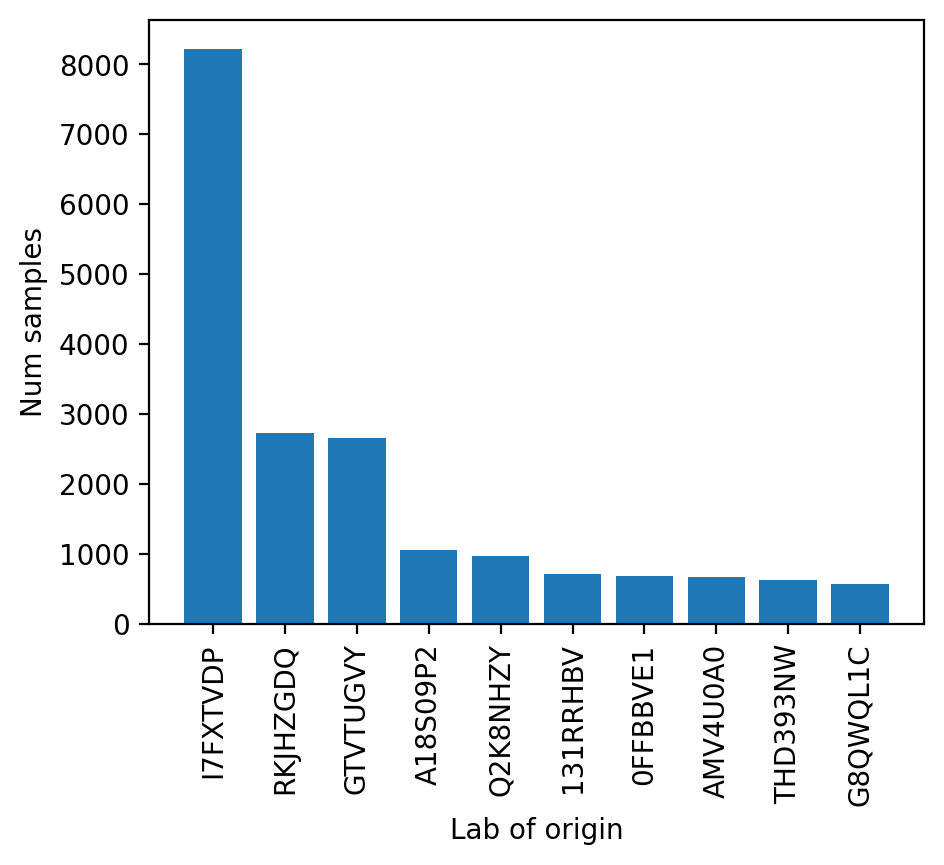

In [19]:
plt.figure(figsize=(5,4), dpi=200)
plt.bar(x=top10_abundant_labs.index, height=top10_abundant_labs.values)
plt.xticks(rotation = 90)
plt.xlabel('Lab of origin')
plt.ylabel('Num samples')
plt.show()

Since the first class is very very abundant, and the 2nd and 3rd are mostly equal, I will go for the 2nd and 3rd ones.

### Get seqs of 2nd and 3rd most abundant labs

In [17]:
print(top10_abundant_labs[1:3])

RKJHZGDQ    2732
GTVTUGVY    2660
dtype: int64


In [18]:
sele_labs = top10_abundant_labs[1:3].index.to_list()
print(sele_labs)

['RKJHZGDQ', 'GTVTUGVY']


In [19]:
sele_index = labels[(labels == sele_labs[0]) | (labels == sele_labs[1])]
print(sele_index.value_counts())
print(sele_index)

RKJHZGDQ    2732
GTVTUGVY    2660
dtype: int64
sequence_id
L49BX    RKJHZGDQ
6VLZP    RKJHZGDQ
J54VR    RKJHZGDQ
Q3PS9    RKJHZGDQ
CIPPO    RKJHZGDQ
           ...   
O1SJN    RKJHZGDQ
8MMHC    RKJHZGDQ
U15WY    RKJHZGDQ
506VJ    RKJHZGDQ
4DMNR    RKJHZGDQ
Length: 5392, dtype: object


In [20]:
sele_train = train_vals.loc[sele_index.index].copy()

In [21]:
sele_train = sele_train.join(sele_index.rename('label'))
sele_train = sele_train[['sequence','label']]

In [22]:
sele_train.head()

,sequence,label
sequence_id,,
L49BX,CACCGTCGATCCGGACCGCCACATCGAGCGGGTCACCGAGCTGCAA...,RKJHZGDQ
6VLZP,TTCGGCCTATTGGTTAAAAAATGAGCTGATTTAACAAAAATTTAAC...,RKJHZGDQ
J54VR,CTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCC...,RKJHZGDQ
Q3PS9,CTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCC...,RKJHZGDQ
CIPPO,CCCGGGGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCATAG...,RKJHZGDQ


/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


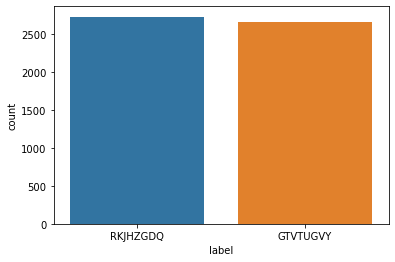

In [23]:
sns.countplot(sele_train.label)
plt.show()

### Get only the first 100 residues of the sequences

In [24]:
sele_train['sequence_100'] = [seq[:100] for seq in sele_train['sequence']]

In [25]:
sele_train['sequence_100'].value_counts()

CCCGGGTGCAAAGATGGATAAAGTTTTAAACAGAGAGGAATCTTTGCAGCTAATGGACCTTCTAGGTCTTGAAAGGAGTGGGAATTGGCTCCGGTGCCCG    2705
CGTTACATAACTTACGGTAAATGGCCCGCCTGGCTGACCGCCCAACGACCCCCGCCCATTGACGTCAATAATGACGTATGTTCCCATAGTAACGCCAATA     108
GTGAACCGTCAGATCCGCTAGCGCTACCGGACTCAGATCTCGAGCTCAAGCTTCGAATTCTGCAGTCGACGGTACCGCGGGCCCGGGATCCACCGGTCGC      58
CATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCATAGCCCATATATGGAGTTCCGCGTTACATAACTTACGGTAAATGGCCCGCCTGG      37
CATGTTCTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCCATGCATTAGTTATTAATAGTAATCAATTACGGGGTCATTAGTTCATAG      29
                                                                                                        ... 
TGGACGAGCTGTACAAGTCCGGAGAAGGGCAAGGGCAAGGGCAAGGGCCGGGCCGCGGCTACGCGTATCGATCCATGTTCGAGGCGCGCCTGGTCCAGGG       1
CCTTGCTCACCATGGTGGCGACCGGTGGATCCCGGGCCCGCGGTACCGTCGACTGCAGAATTCGAAGCTTGAGCTCGAGACAGAAGAGTTTGAGAAAGCA       1
GACGAGCTGTACAAGTCCGGACTCAGATCTGGTGGCTCCGCAGGATCCCGGCAAGAAGAAGCAAAGGCTGCTGTAGGTGTGACTGGAAATGACATCACTA       1
ACGTCAGATCCGCTAGCCG

Taking the first 100nts of the sequence is not useful, as the ones of one class always start with the same sequence

In [26]:
sele_train[sele_train['sequence_100'] == 'CCCGGGTGCAAAGATGGATAAAGTTTTAAACAGAGAGGAATCTTTGCAGCTAATGGACCTTCTAGGTCTTGAAAGGAGTGGGAATTGGCTCCGGTGCCCG'].label.value_counts()

RKJHZGDQ    2705
Name: label, dtype: int64

### Take multiple subsequences of each sequence

Are the lengths balanced overall between classes? If they aren't I could be compromising the balances

The plasmids of the class RKJHZGDQ are much larger than those of GTVTUGVY

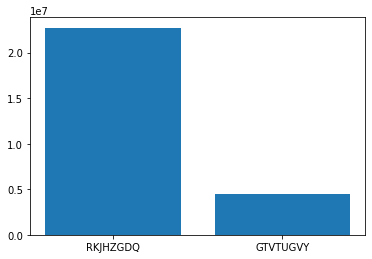

In [27]:
plt.bar(x=sele_labs, height=[
    np.sum([len(seq) for seq in sele_train[sele_train['label'] == sele_labs[0]]['sequence']]),
    np.sum([len(seq) for seq in sele_train[sele_train['label'] == sele_labs[1]]['sequence']])    
])
plt.show()

The mean plasmid length is very very different

/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


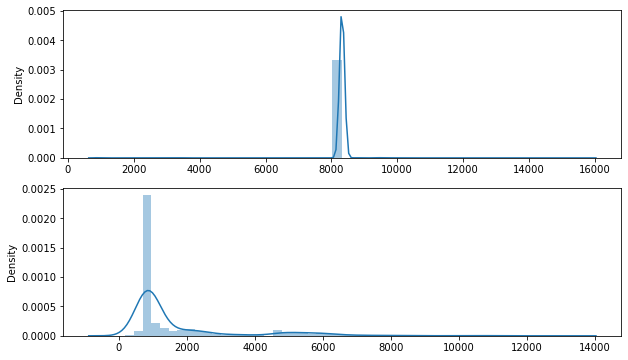

In [28]:
fig, axs = plt.subplots(2,1, figsize=(10,6))
sns.distplot([len(seq) for seq in sele_train[sele_train['label'] == sele_labs[0]]['sequence']], ax=axs[0])
sns.distplot([len(seq) for seq in sele_train[sele_train['label'] == sele_labs[1]]['sequence']], ax=axs[1])
plt.show()

But still, the median is much larger than 100 so easily I can get different sequences for this class

In [29]:
np.median([len(seq) for seq in sele_train[sele_train['label'] == sele_labs[1]]['sequence']])

880.0

Note: I am creating some unbalances!! THe class with shorter plasmid will get more repeated sequences likely than the one that is larger when sampling randomly... so likely I am helping the model...

For each sequence, take 8 subsequences randomly and also Reverse Translate them randomly

In [30]:
num_subseq_per_seq = 8
seq_len = 101


random_seq_sele = []

np.random.seed(42)

for seq in sele_train['sequence']:
    sub_list = []
    for _ in range(num_subseq_per_seq):
        # if sequence is shorter, take entire sequence and it will be padded
        # if it has a N on it, this is a problem and would be better to manually analyze and discard this observation before running cell
        if len(seq) <= seq_len:
            if 'N' in seq.upper(): 
                raise ValueError("Can't process sequences, found a sequence shorter than seq_len and with a N character...discard this sequence")
            # with probability 0.5 make the Reverse Complement of that sequence
            if np.random.rand() > .5:
                sub_list.append(seq)
            else:
                sub_list.append(rev_comp(seq))
        else:
            # if sequence is longer, need to randomly select a subsequence
            subseq ='' # initialize to enter while
            # keep looking for subsequences until they do not have any N (this might bias a bit the initial positions)
            while ('N' in subseq.upper()) or (len(subseq) != seq_len):
                start_pos = np.random.randint(len(seq) - seq_len + 1)
                subseq = seq[start_pos:start_pos+seq_len]
            # with probability 0.5 make the Reverse Complement of that sequence
            if np.random.rand() > .5:
                sub_list.append(subseq)
            else:
                sub_list.append(rev_comp(subseq))
    random_seq_sele.append(sub_list)

In [31]:
# 8 subsequences per each sequence
np.array(random_seq_sele).shape

(5392, 8)

In [32]:
sele_train['random_seq_sele'] = random_seq_sele

I don't look at repeats here bc there are probably some as I take randomly

In [33]:
# there are 225 repeats in this subset, not a problem, it can just happen by random selection and it is not much compared to 5000 total examples
# print(sele_train['random_seq_sele'].shape)
# print(np.sum(sele_train['random_seq_sele'].value_counts() > 1))

## Conver to kmers

In [34]:
kmer_size = 6

Use their function seq2kmer from `motif/motif_utils.py`

In [35]:
def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space

    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

Example

In [36]:
sele_train['kmer_rand'] = [[seq2kmer(seq, kmer_size) for seq in subseq] for subseq in sele_train['random_seq_sele']]

In [37]:
print("Note that in this case each sequence has 8 different kmer representations coming from the random 8 subsequences")
len(sele_train['kmer_rand'][0])

Note that in this case each sequence has 8 different kmer representations coming from the random 8 subsequences


8

In [38]:
sele_train['bin_label'] = [1 if lab == sele_labs[0] else 0 for lab in sele_train['label']]

In [39]:
print(f'Lab 1 is: {sele_labs[0]}')
print(f'Lab 0 is: {sele_labs[1]}')

Lab 1 is: RKJHZGDQ
Lab 0 is: GTVTUGVY


In [40]:
sele_train.shape

(5392, 6)

Now, I need to get individual subsequence kmer represnetations as each row, so numbers of rows will grow 8 times more...

In [41]:
final_data = []

for seq_idx, row in sele_train.iterrows():
    bin_label = row['bin_label']
    for seq in row['kmer_rand']:
        final_data.append({
            'sequence_id': seq_idx,
            'sequence': seq,
            'label': bin_label
        })

final_data = pd.DataFrame.from_records(final_data)

In [42]:
final_data.shape

(43136, 3)

In [43]:
5392*8

43136

#### Important

Since original were already balanced here I get balanced classes too. 

**However, since the sequences are much shorter for one class than for the other one, the "coverage" or likelihood of one nucleotide to be included in more than one sequence (even if it is reverse complement) for the sample is much higher in one of the classes than in the other one (like 10x times higher as the median length of plasmid is 10x times smaller).**

In [44]:
final_data.label.value_counts()

1    21856
0    21280
Name: label, dtype: int64

In [45]:
final_data.set_index('sequence_id', inplace=True)

## Split data

Original finetuning data is split between a dev.tsv file with 1000 observations and a train.tsv file with 32367 observations. I think the dev set is used during training to evaluate the accuracy on a held-out dataset (test accuracy). So I will do the same here.

Here I need to do it based on positions, as multiple entries have repeated index

In [46]:
dev_set = np.random.choice(len(final_data), 1000, replace=False)

/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

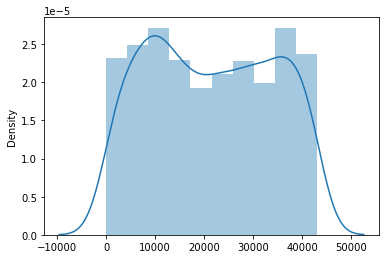

In [47]:
sns.distplot(dev_set)

In [48]:
dev_data = final_data.iloc[dev_set].copy()

to get the train_data I need to make a list from 0 to len(train_data) excluding those indices in dev_data

In [49]:
train_data = final_data.iloc[[i for i in range(0, len(final_data)) if i not in dev_set]].copy()

They are balanced

/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


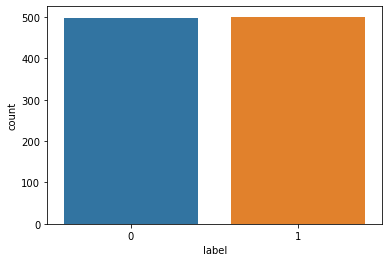

In [50]:
sns.countplot(dev_data.label)
plt.show()

/home/mexposit/miniconda3/envs/comp_genomics/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


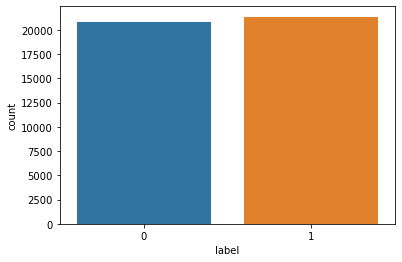

In [51]:
sns.countplot(train_data.label)
plt.show()

### Export

Finally, export this dataframes in the appropriate format and in a .csv file that could be read back to pandas (which contains information about the indices!)

In [52]:
train_data.to_csv(f'{path_prefix}/transformers/3_binmulti/in_data/train_data.csv')
dev_data.to_csv(f'{path_prefix}/transformers/3_binmulti/in_data/dev_data.csv')

Model will use these tsv files.

In [53]:
train_data.to_csv(f'{path_prefix}/transformers/3_binmulti/in_data/train.tsv', sep='\t', index=False)
dev_data.to_csv(f'{path_prefix}/transformers/3_binmulti/in_data/dev.tsv', sep='\t', index=False)